# Modules

In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import sys

sys.path.insert(1, '/home/mauricio/code/mcr')
from mcr.nlp import ngram_builder, ngram_plot, tokenized_stopwords, WordTokenizer

# Example corpus

In [2]:
text = ''
text += '''
Punkt knows that the periods in Mr. Smith and Johann S. Bach
do not mark sentence boundaries.  And sometimes sentences
can start with non-capitalized words.  i is a good variable
name.
'''
text += '''
(How does it deal with this parenthesis?)  "It should be part of the
previous sentence." "(And the same with this one.)" ('And this one!')
"('(And (this)) '?)" [(and this. )]
'''
text += 'Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks.'
print(text)


Punkt knows that the periods in Mr. Smith and Johann S. Bach
do not mark sentence boundaries.  And sometimes sentences
can start with non-capitalized words.  i is a good variable
name.

(How does it deal with this parenthesis?)  "It should be part of the
previous sentence." "(And the same with this one.)" ('And this one!')
"('(And (this)) '?)" [(and this. )]
Good muffins cost $3.88
in New York.  Please buy me
two of them.

Thanks.


# Ngram builder and plot function
Wrapper function of sklearn and nltk packages that generates a dataframe of n-gram range tokens.

In [3]:
ngram_builder

<function mcr.nlp.nlp.ngram_builder(corpus, vectorizer=<class 'sklearn.feature_extraction.text.CountVectorizer'>, tokenizer=<mcr.nlp.nlp.WordTokenizer object at 0x7ff56f2f2940>, lowercase=True, stop_words=None, ngram_range=(1, 1), min_df=1, max_df=1.0, max_features=None, vocabulary=None, dtype=None)>

In [4]:
ngrams = ngram_builder(text, ngram_range=(1,2))
ngrams

,count,n
ngram,,
and,6,1
this,5,1
the,3,1
with,3,1
good,2,1
...,...,...
two of,1,2
variable name,1,2
with non,1,2


In [5]:
ngram_plot

<function mcr.nlp.nlp.ngram_plot(ngrams, suptitle=None, rows_per_page=50, figsize=None)>

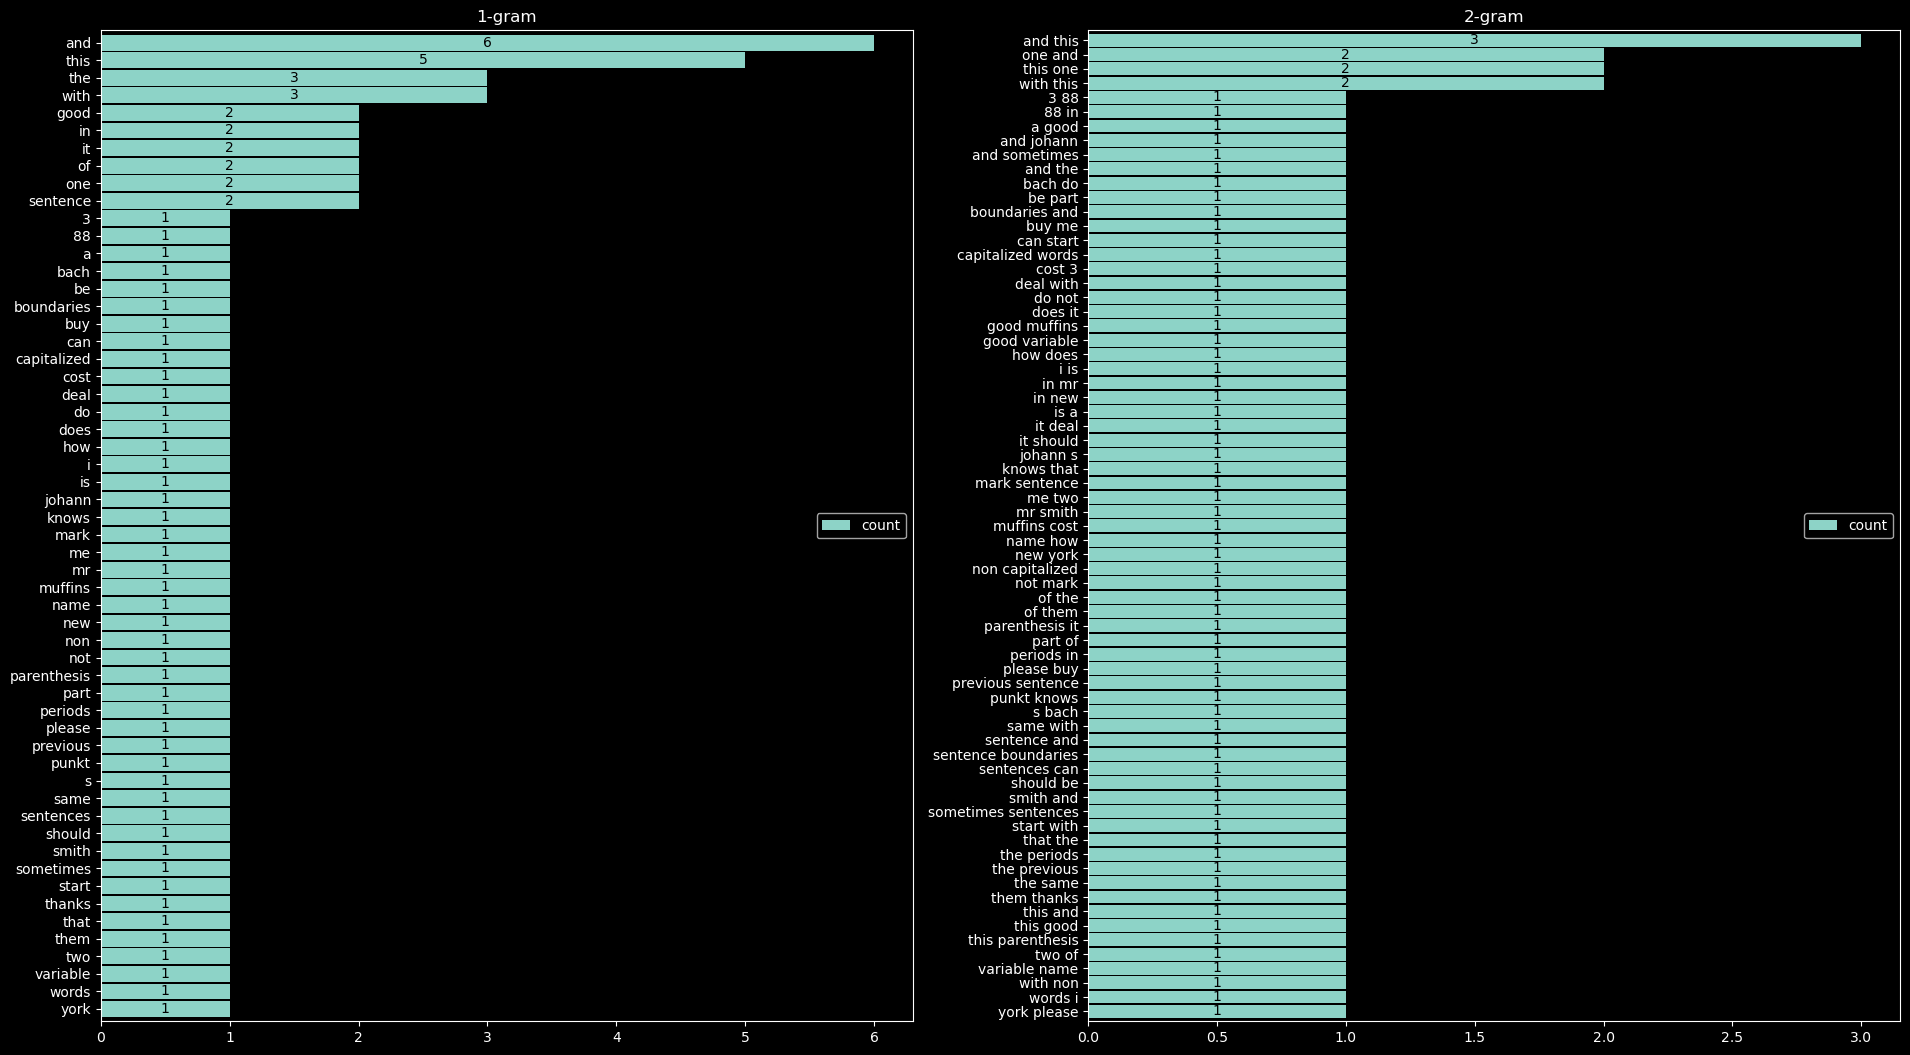

In [6]:
ngram_plot(ngrams, figsize=(19.2, 10.8))

## Removing stopwords (blacklist)

In [7]:
print(tokenized_stopwords())

['while', 'anything', 'don', 'twenty', 'con', 'interest', 'nine', 'within', 'though', 'so', 'to', 'although', 'becoming', 'hundred', 'anyway', 'might', 'shan', 'haven', 'put', 'thereby', 'mill', 'll', 'everyone', 'whenever', 'your', 'yours', 'doesn', 'call', 'did', 'seeming', 'seems', 'thin', 'therefore', 'meanwhile', 'she', 'couldnt', 'therein', 'another', 'd', 'beyond', 'you', 'me', 'a', 'not', 'theirs', 'the', 'former', 'four', 'again', 'besides', 'are', 'throughout', 'they', 'mustn', 'thence', 'along', 'often', 'detail', 'may', 'have', 'such', 'sixty', 'because', 'six', 'be', 'three', 'thru', 'towards', 'whereupon', 'its', 'is', 'having', 'now', 'thereupon', 'mine', 'after', 'had', 'am', 'per', 'whose', 'very', 'hence', 'already', 'been', 'will', 'yet', 'even', 'something', 'only', 'fifty', 'never', 'least', 'one', 'via', 'found', 'describe', 'wherein', 'back', 'by', 'herself', 'into', 'about', 'becomes', 'ourselves', 'perhaps', 'isn', 'bill', 'under', 'become', 'mostly', 'through'

In [8]:
ngrams_ = ngram_builder(['a b', 'c d'],
                        stop_words=tokenized_stopwords(language='portuguese'))
ngrams_

,count,n
ngram,,
b,1,1
c,1,1
d,1,1


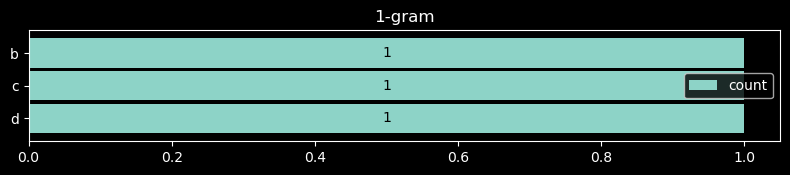

In [9]:
ngram_plot(ngrams_, figsize=(8, 2))

## Replacing vocabulary (whitelist)

In [10]:
ngrams_ = ngram_builder(['a b', 'c d'],
                        vocabulary=['a', 'b'])
ngrams_

,count,n
ngram,,
a,1,1
b,1,1


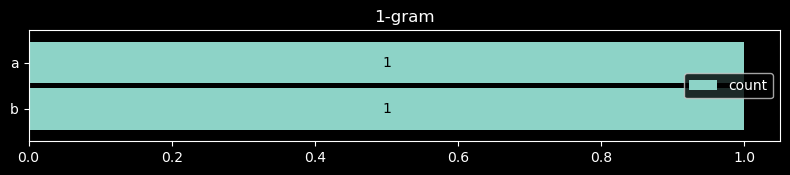

In [11]:
ngram_plot(ngrams_, figsize=(8, 2))